Score:  0.8666666666666667
Confusion Matrix:
[[33  6]
 [ 4 32]]
Classification Report:
              precision    recall  f1-score   support

  Not Stroke       0.89      0.85      0.87        39
      Stroke       0.84      0.89      0.86        36

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75

------------------------------
Score:  0.8533333333333334
Confusion Matrix:
[[31  8]
 [ 3 33]]
Classification Report:
              precision    recall  f1-score   support

  Not Stroke       0.91      0.79      0.85        39
      Stroke       0.80      0.92      0.86        36

    accuracy                           0.85        75
   macro avg       0.86      0.86      0.85        75
weighted avg       0.86      0.85      0.85        75

------------------------------
Score:  0.8666666666666667
Confusion Matrix:
[[34  5]
 [ 5 31]]
Classification Report:
              precision

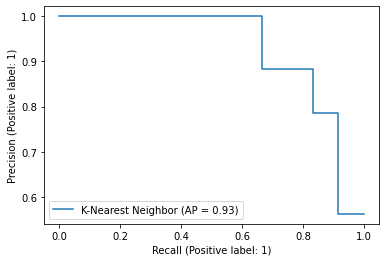

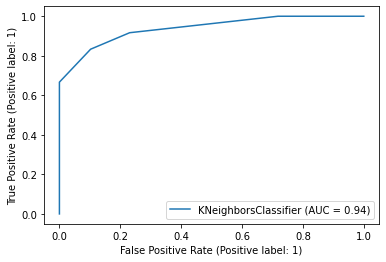

After applying PCA, score is:  0.75


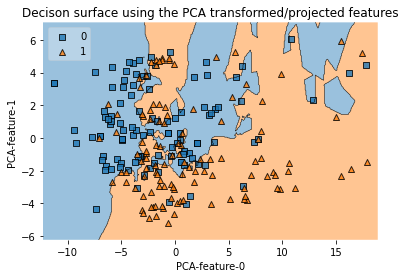

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn import decomposition
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel('data.xlsx')

# perform ordinal encoding for ordinal features
enc = preprocessing.OrdinalEncoder(dtype=int)
enc.fit(df[["Age", "What is your normal blood pressure?", "What is work intensity?", "How many hours do you work on average?",
           "Do you feel starved for company?"]])
df[["Age", "What is your normal blood pressure?", "What is work intensity?", "How many hours do you work on average?",
           "Do you feel starved for company?"]] = enc.transform(df[["Age", "What is your normal blood pressure?",
                                                                    "What is work intensity?",
                                                                    "How many hours do you work on average?",
                                                                    "Do you feel starved for company?"]])

# print(enc.categories_)

data = df.to_numpy()

# splitting labels
target = data[:, 18]
# removing timestamps column
data = data[:, 1:18]

# performing binarization of target
target[target == 'Yes'] = 1
target[target == 'No'] = 0

# performing binarization on data
temp = data[:, 0]
temp[temp == "Male"] = 1
temp[temp == "Female"] = 0

temp = data[:, 5:12]
temp[temp == "Yes"] = 1
temp[temp == "No"] = 0

temp = data[:, 16]
temp[temp == "Yes"] = 1
temp[temp == "No"] = 0

# calculate BMI from height and weight
data[:, 2] = data[:, 2] / 3.281
data[:, 2] = np.square(data[:, 2])
data[:, 2] = data[:, 3] / data[:, 2]
data = np.delete(data, 3, 1)

# print(data[:10, :])
# print(target)


x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)

y_train = y_train.astype('int')
y_test = y_test.astype('int')


# use euclidean distance with k=5 having equal weights for all nearest neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.predict(x_test)
print('Score: ', knn.score(x_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, knn.predict(x_test)))
print('Classification Report:')
print(classification_report(y_test, knn.predict(x_test), target_names=['Not Stroke', 'Stroke']))
print("------------------------------")

# use euclidean distance with k=10 and unequal weights to neighbors i.e more weight to closest neighbor
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(x_train, y_train)
knn.predict(x_test)
print('Score: ', knn.score(x_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, knn.predict(x_test)))
print('Classification Report:')
print(classification_report(y_test, knn.predict(x_test), target_names=['Not Stroke', 'Stroke']))
print("------------------------------")

# use manhattan distance with k=3 
knn = KNeighborsClassifier(n_neighbors=3, p=1)
knn.fit(x_train, y_train)
knn.predict(x_test)
print('Score: ', knn.score(x_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, knn.predict(x_test)))
print('Classification Report:')
print(classification_report(y_test, knn.predict(x_test), target_names=['Not Stroke', 'Stroke']))
print("------------------------------")

# applying 5-fold stratified cross validation with default model
knn = KNeighborsClassifier()
target = target.astype('int')
print("Mean Accuracy: ", cross_val_score(knn, data, target, cv=5).mean())
print(cross_validate(knn, data, target, cv=5, return_train_score=True))
print("------------------------------")


# plot the precision recall curve
knn.fit(x_test, y_test)
plot_precision_recall_curve(knn, x_test, y_test, name='K-Nearest Neighbor')
plt.show()

# yhat = knn.predict(x_test)
# lr_f1, lr_auc = f1_score(y_test, yhat), auc(recall, precision)
# print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the roc curve
plot_roc_curve(knn, x_test, y_test)
plt.show()


# dimensionality reduction for displaying the decision boundary
pca = decomposition.PCA(n_components=2)
pca.fit(x_train)
X = pca.transform(x_train)
knn = KNeighborsClassifier()
knn.fit(X, y_train)
print('After applying PCA, score is: ', knn.score(X, y_train))

plot_decision_regions(X, y_train, clf=knn, legend=2)

# Adding axes annotations
plt.xlabel('PCA-feature-0')
plt.ylabel('PCA-feature-1')
plt.title('Decison surface using the PCA transformed/projected features')
plt.show()
